Ejercicio 1
Implementa una capa convolucional con las siguientes propiedades:
• Tamaño de filtro: 5x5
• Número de filtros: 16
• Stride: 1x1
• Padding: Aquel que genere una imagen de salida de igual tamaño que la imagen de entrada

In [5]:
import numpy as np
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [6]:
img = Image.open('./imgs/your-name.jpg')
img = np.array(img)
# Añadimos primera dimensión para construir matriz tal que tengamos [n imagenes, n filas, n columnas,
# n canales]
img = np.expand_dims(img, axis=0)
print('Tamaño de imagen original: ', img.shape)

Tamaño de imagen original:  (1, 1260, 3360, 3)


In [7]:
# Capa de entrada donde especificamos el tamaño de la imagen de entrada (n filas, n columnas, n canales)
input_layer = layers.Input(shape=img.shape[1:])

# Capa convolucional con 8 filtros de tamaño 3x3
layer_conv = layers.Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), padding="same")(input_layer)

model = Model(inputs=[input_layer], outputs=[layer_conv])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1260, 3360, 3)]   0         
                                                                 
 conv2d_1 (Conv2D)           (None, 1260, 3360, 16)    1216      
                                                                 
Total params: 1216 (4.75 KB)
Trainable params: 1216 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
img_model = model.predict(img)
print('Tamaño imagen filtrada: ', layer_conv.shape)

1/1 [==============================] - 0s 108ms/step
Tamaño imagen filtrada:  (None, 1260, 3360, 16)


Preguntas:

* Calcula el número de parámetros que va a tener que ajustar la capa que hemos implementado, ¿coincide
con lo especificado por Keras?
  - El número de parámetros que va a tener que ajustar la capa es: (5 * 5 * 3 + 1) * 16 = 1.216
  - Sí, el número calculado coincide por el especificado por Keras.
* ¿Cuál es el tamaño de la imagen de salida?
  - El tamaño de la imagen de salida es de 1260 x 3360 (igual que la entrada).
* ¿Qué padding es el apropiado para conseguir nuestros objetivos?
  - El padding apropiado para conseguir nuestros objetivos es 'same',

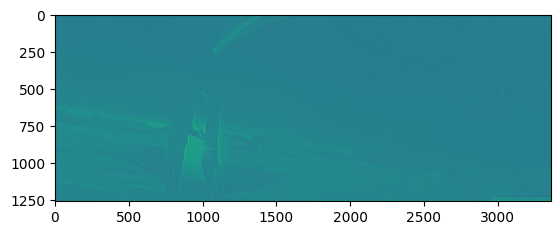

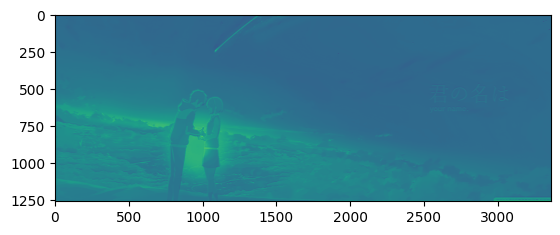

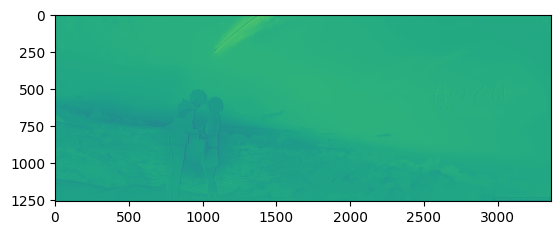

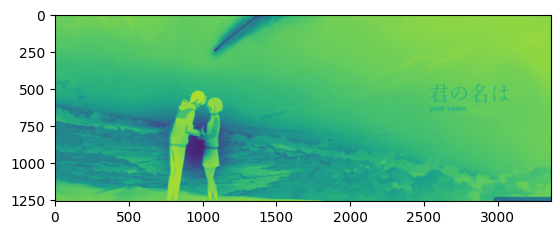

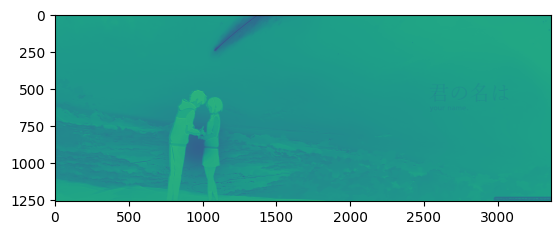

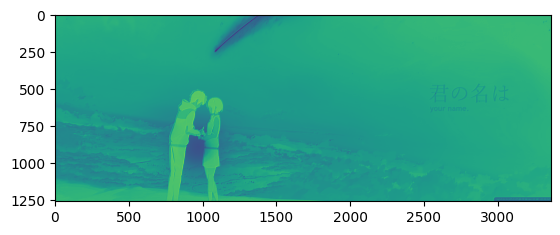

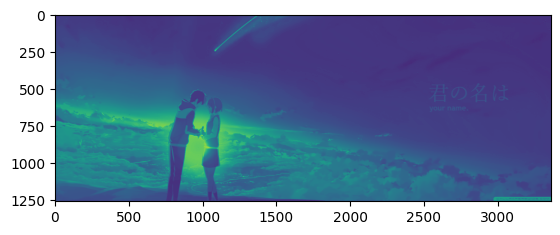

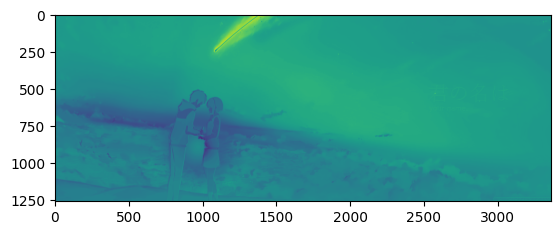

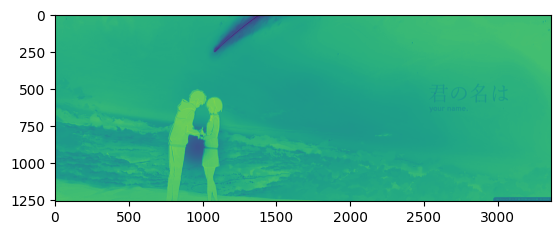

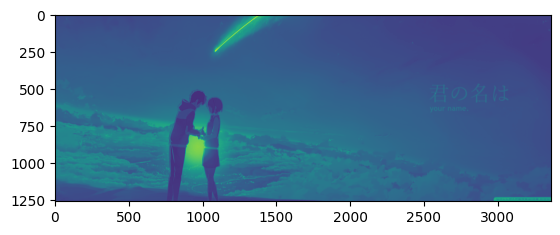

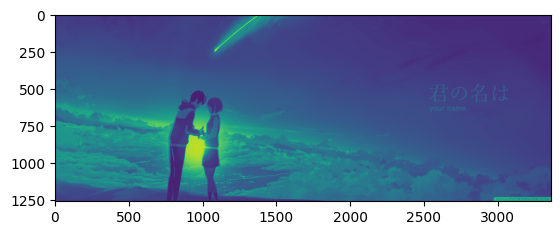

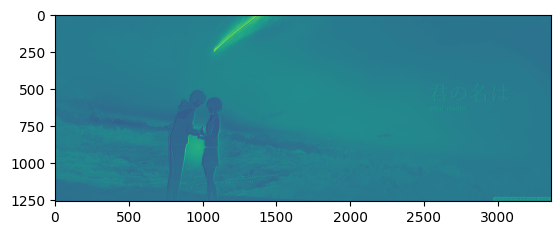

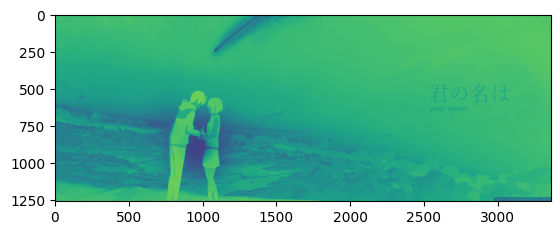

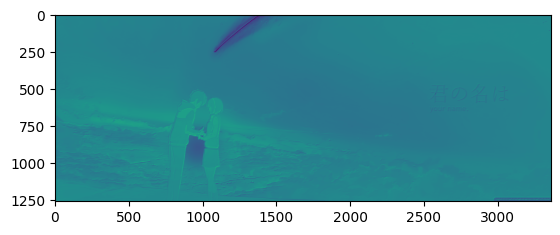

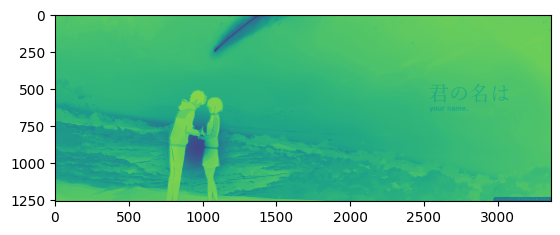

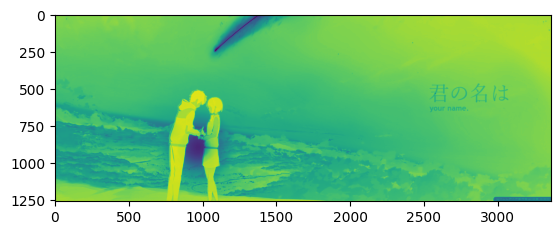

In [18]:
for i in range(16):
    plt.imshow(img_model[0, :, :, i])
    plt.show()